In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
train_file = './train.csv'
df = pd.read_csv(train_file)

In [104]:
#look at the first 3 rows
df[:20]

,Id,Prediction,NextId,Position,p_0_0,p_0_1,p_0_2,p_0_3,p_0_4,p_0_5,...,p_14_6,p_14_7,p_15_0,p_15_1,p_15_2,p_15_3,p_15_4,p_15_5,p_15_6,p_15_7
0,1,o,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,m,3,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,m,4,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,a,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,n,6,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,d,7,6,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
6,7,i,8,7,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
7,8,n,9,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,g,-1,9,0,1,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
9,10,o,11,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#look at first 5 rows of one specific column
df['Prediction'][:5]

0    o
1    m
2    m
3    a
4    n
Name: Prediction, dtype: object

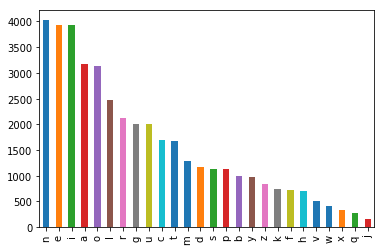

In [61]:
# look at the frequency of each character appears in the trainning set
prediction_value_counts = df['Prediction'].value_counts()
prediction_value_counts.plot(kind='bar')

In [44]:
# where the word ends
word_end_indices = list(df[df.NextId == -1].index)

In [48]:
# There are totally 5487 words in training data
len(word_end_indices)

5487

In [62]:
wordset = set([])
words = []
begin =0
for wend in word_end_indices:
    word = ''.join(df['Prediction'][begin:wend+1])
    #if word not in wordset:
    wordset.add(word)
    begin = wend + 1
    words.append(word)
        
d = {word:words.count(word) for word in words}
#look at the frequency of each word appears in the training set
d

{'abulously': 107,
 'acking': 118,
 'afeteria': 83,
 'ake': 101,
 'anquish': 116,
 'ate': 107,
 'axi': 127,
 'ccountability': 82,
 'cknowledgement': 72,
 'earbook': 101,
 'eclaring': 112,
 'ecompress': 113,
 'eeker': 114,
 'ejuvenating': 60,
 'enu': 113,
 'eography': 112,
 'ero': 110,
 'evving': 103,
 'gonizingly': 113,
 'hadow': 112,
 'idding': 119,
 'isqualified': 97,
 'kiing': 120,
 'mbraces': 104,
 'mitted': 59,
 'ncomfortably': 80,
 'nconsequential': 64,
 'ndustrialized': 86,
 'nexpected': 101,
 'nnouncing': 103,
 'nvulnerable': 77,
 'nworkable': 115,
 'obble': 110,
 'olcanic': 118,
 'ommanding': 106,
 'omparatively': 65,
 'omplex': 114,
 'ormalization': 88,
 'overning': 104,
 'poiling': 119,
 'pproaching': 102,
 'ransform': 87,
 'rightfully': 85,
 'rojections': 93,
 'uff': 111,
 'ugging': 115,
 'uizzically': 73,
 'ump': 121,
 'urrounded': 103,
 'ustifications': 75,
 'uzz': 114,
 'uzzlement': 94,
 'wab': 109,
 'ylophone': 100,
 'ympathetically': 80}

In [103]:
# feature 1: length of the word
unique_words = np.unique(words)
len_arr = []
for unique_word in unique_words:
    len_arr.append(len(unique_word))
    
dic = {'word' : unique_words, 'word_length': len_arr}
wordset = pd.DataFrame(dic)

grouped_wordset = wordset.groupby('word_length')['word'].apply(lambda x: "[%s]" % ', '.join(x))
grouped_wordset


word_length
3         [ake, ate, axi, enu, ero, uff, ump, uzz, wab]
5                          [eeker, hadow, kiing, obble]
6      [acking, evving, idding, mitted, omplex, ugging]
7         [anquish, earbook, mbraces, olcanic, poiling]
8     [afeteria, eclaring, eography, overning, ransf...
9     [abulously, ecompress, nexpected, nnouncing, n...
10    [gonizingly, pproaching, rightfully, rojection...
11              [ejuvenating, isqualified, nvulnerable]
12           [ncomfortably, omparatively, ormalization]
13        [ccountability, ndustrialized, ustifications]
14     [cknowledgement, nconsequential, ympathetically]
Name: word, dtype: object

KeyError: 'word_length'

In [110]:
df['Prediction_int'] = df['Prediction'].apply(lambda x: ord(x) - 96)

In [111]:
df['Prediction_int'] 

0        15
1        13
2        13
3         1
4        14
5         4
6         9
7        14
8         7
9        15
10       13
11       13
12        1
13       14
14        4
15        9
16       14
17        7
18       15
19       13
20       13
21        1
22       14
23        4
24        9
25       14
26        7
27       15
28       13
29       13
         ..
41538     1
41539    12
41540    14
41541     3
41542    15
41543    14
41544    19
41545     5
41546    17
41547    21
41548     5
41549    14
41550    20
41551     9
41552     1
41553    12
41554    14
41555     3
41556    15
41557    14
41558    19
41559     5
41560    17
41561    21
41562     5
41563    14
41564    20
41565     9
41566     1
41567    12
Name: Prediction_int, Length: 41568, dtype: int64

TypeError: ord() expected a character, but string of length 2 found

In [109]:
ord('a')

97